In [43]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

iris = sns.load_dataset('iris')

feat_columns = iris.columns[:-1]
target_column = iris.columns[-1]

color_map = {species: i for i, species in enumerate(set(iris.species))}
color = iris.species.apply(color_map.get)

val_ratio = 0.15
# np.random.seed(25512)
train_rows = np.random.rand(iris.shape[0]) > val_ratio

X_train = iris[train_rows][feat_columns]
y_train = color[train_rows]

X_val = iris[~train_rows][feat_columns]
y_val = color[~train_rows]

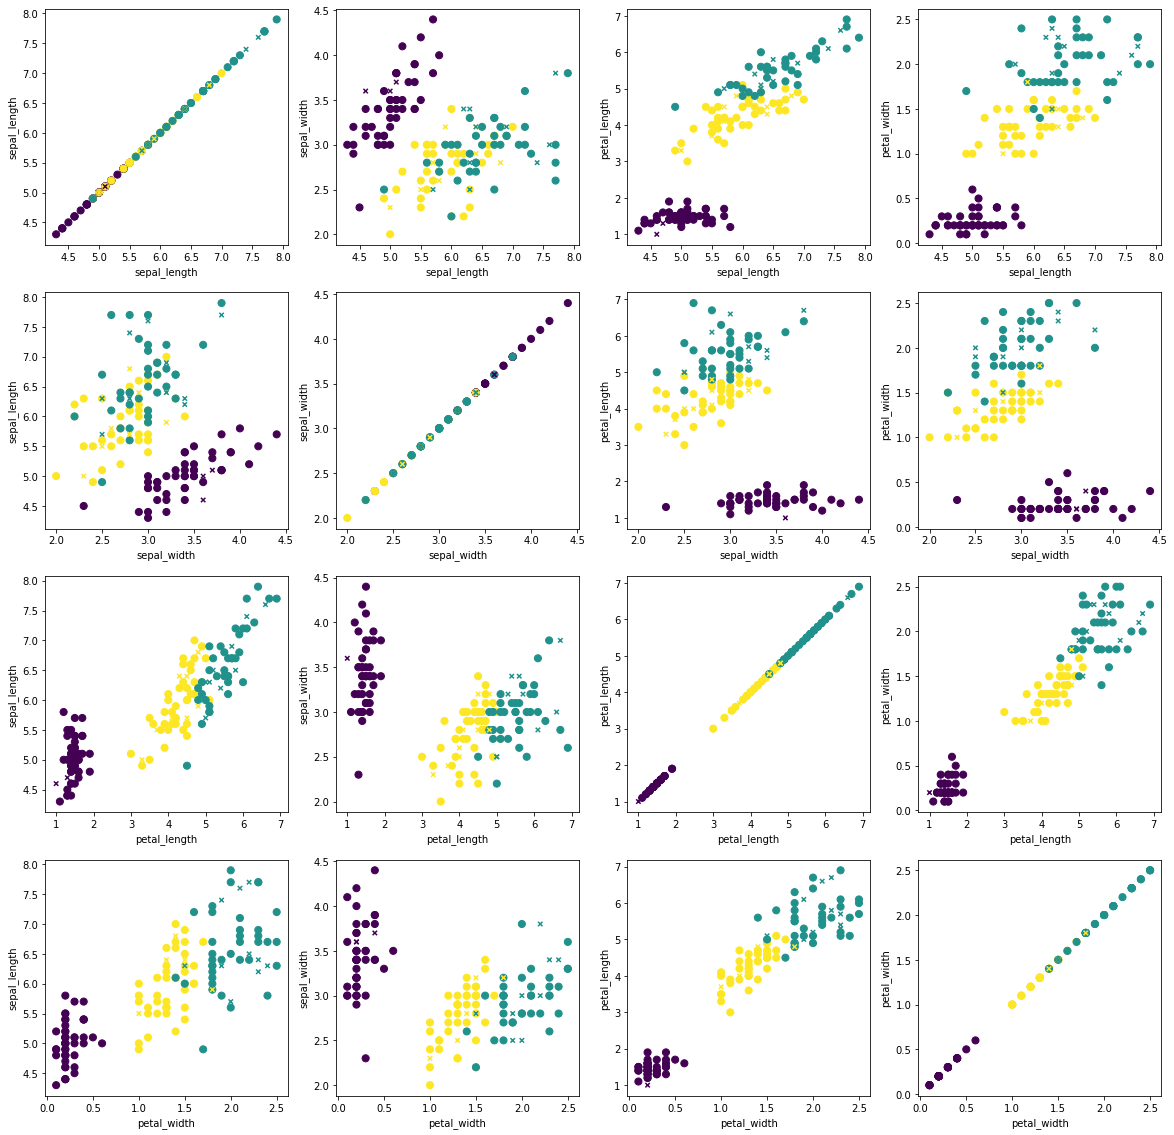

In [41]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
feat_columns = iris.columns[:-1]

for i, feat1 in enumerate(feat_columns):
    for j, feat2 in enumerate(feat_columns):
        for subset in 'train val'.split():
            if subset == 'train':
                X = X_train
                y = y_train
                marker = 'o'
                s = 50
                
            else:
                X = X_val
                y = y_val
                marker = 'x'
                s = 20
                
            x1 = X[feat1]
            x2 = X[feat2]

            ax = axes[i, j]

            ax.scatter(x1, x2, c=y, marker=marker, s=s)
            ax.set_xlabel(feat1)
            ax.set_ylabel(feat2)
        

# Непосредственно классификатор

In [26]:
class kNN_classifier:
    def __init__(self, data, k):
        self.data = data
        self.k = k
        
        self.X = iris.drop(columns='species').values
        self.y = iris.species.values
        
    def __call__(self, x):
        dist = (self.X - x) ** 2
        dist = dist.sum(axis=1)
        dist = np.sqrt(dist)
        
        neighbours = np.argsort(dist) 
        answers = self.y[neighbours[:self.k]]
        
        counts = {ans: (answers == ans).sum() for ans in set(answers)}
        return sorted(counts, key=counts.get, reverse=True)[0]


In [44]:
for k in range(1, 50):
    classifier = kNN_classifier(iris[train_rows], k=k)

    predictions = []

    for val_sample in X_val.values:
        pred = classifier(val_sample)
        predictions.append(pred)

    predictions = np.array(predictions)
    acc = (predictions == iris[~train_rows][target_column]).sum() / len(predictions) * 100
    print(f'Соседей: {k} / Accuracy: {acc:0f}%')

Соседей: 1 / Accuracy: 100.000000%
Соседей: 2 / Accuracy: 100.000000%
Соседей: 3 / Accuracy: 100.000000%
Соседей: 4 / Accuracy: 100.000000%
Соседей: 5 / Accuracy: 100.000000%
Соседей: 6 / Accuracy: 100.000000%
Соседей: 7 / Accuracy: 100.000000%
Соседей: 8 / Accuracy: 100.000000%
Соседей: 9 / Accuracy: 100.000000%
Соседей: 10 / Accuracy: 100.000000%
Соседей: 11 / Accuracy: 100.000000%
Соседей: 12 / Accuracy: 100.000000%
Соседей: 13 / Accuracy: 100.000000%
Соседей: 14 / Accuracy: 100.000000%
Соседей: 15 / Accuracy: 100.000000%
Соседей: 16 / Accuracy: 100.000000%
Соседей: 17 / Accuracy: 100.000000%
Соседей: 18 / Accuracy: 100.000000%
Соседей: 19 / Accuracy: 100.000000%
Соседей: 20 / Accuracy: 100.000000%
Соседей: 21 / Accuracy: 100.000000%
Соседей: 22 / Accuracy: 100.000000%
Соседей: 23 / Accuracy: 100.000000%
Соседей: 24 / Accuracy: 100.000000%
Соседей: 25 / Accuracy: 100.000000%
Соседей: 26 / Accuracy: 100.000000%
Соседей: 27 / Accuracy: 100.000000%
Соседей: 28 / Accuracy: 100.000000%
С